## Preprocessing dan Feature Engineering

## Import Package

In [ ]:
#Import library untuk data preparation dan visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

# import pickle and json file for columns and model file
import pickle
import json
import joblib

#Import package untuk balancing dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

## Read Data

In [ ]:
#Read data X_train dan y_train hasil dari data preparation
X_train = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/2 - processed/X_train.pkl")
y_train = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/2 - processed/y_train.pkl")

#Read data X_valid dan y_valid hasil dari data preparation
X_valid = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/2 - processed/X_valid.pkl")
y_valid = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/2 - processed/y_valid.pkl")

#Read data X_test dan y_test hasil dari data preparation
X_test = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/2 - processed/X_test.pkl")
y_test = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/2 - processed/y_test.pkl")

In [ ]:
#Menyatukan data X_train dan y_train untuk dilakukan preprocessing dan Feature Engineering menjadi satu set
dataset = pd.concat([X_train, y_train], axis = 1)

#Menyatukan data X_valid dan y_valid untuk dilakukan preprocessing dan Feature Engineering menjadi satu set
valid_set = pd.concat([X_valid, y_valid], axis = 1)

#Menyatukan data X_test dan y_test untuk dilakukan preprocessing dan Feature Engineering menjadi satu set
test_set = pd.concat([X_test, y_test], axis = 1)

## Handling Missing Value

In [100]:
from sklearn.impute import SimpleImputer

def numericalImputation(data, numerical_column):
    """
    Fungsi untuk melakukan imputasi data numerik
    :param data: <pandas dataframe> sample data input
    :param numerical_column: <list> list kolom numerik data
    :return X_train_numerical: <pandas dataframe> data numerik
    :return imputer_numerical: numerical imputer method
    """
    # Filter data numerik
    numerical_data = data[numerical_column]

    # Buat imputer
    imputer_numerical = SimpleImputer(missing_values = np.nan,
                                      strategy = "mean")
    imputer_numerical.fit(numerical_data)

    # Transform
    imputed_data = imputer_numerical.transform(numerical_data)
    numerical_data_imputed = pd.DataFrame(imputed_data)

    numerical_data_imputed.columns = numerical_column
    numerical_data_imputed.index = numerical_data.index

    return numerical_data_imputed, imputer_numerical

In [101]:
def categoricalImputation(data, categorical_column):
    """
    Fungsi untuk melakukan imputasi data kategorik
    :param data: <pandas dataframe> sample data input
    :param categorical_column: <list> list kolom kategorikal data
    :return categorical_data: <pandas dataframe> data kategorikal
    """
    # seleksi data
    categorical_data = data[categorical_column]
    
    # Imputasi dengan menggunakan median
    median = categorical_data.median()

    # lakukan imputasi
    categorical_data = categorical_data.fillna(median)

    return categorical_data

In [102]:
import pandas as pd

def one_hot_encode(df, columns):
    """
    Mengubah variabel kategorikal menjadi one-hot encoded di dalam sebuah dataframe pandas
    
    Parameters:
    df (pandas.DataFrame): Dataframe yang akan diubah
    columns (list): List dari nama kolom yang akan diubah
    
    Returns:
    pandas.DataFrame: Dataframe dengan variabel yang sudah diubah menjadi one-hot encoded
    """
    for col in columns:
        dummies = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummies], axis=1)
        df.drop(col, axis=1, inplace=True)
    return df

In [103]:
def rus_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    rus = RandomUnderSampler(random_state = 123)

    # Balancing set data
    x_rus, y_rus = rus.fit_resample(
        set_data.drop("Exited", axis = 1),
        set_data.Exited
    )

    # Concatenate balanced data
    set_data_rus = pd.concat(
        [x_rus, y_rus],
        axis = 1
    )

    # Return balanced data
    return set_data_rus

In [104]:
def ros_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    ros = RandomOverSampler(random_state = 123)

    # Balancing set data
    x_ros, y_ros = ros.fit_resample(
        set_data.drop("Exited", axis = 1),
        set_data.Exited
    )

    # Concatenate balanced data
    set_data_ros = pd.concat(
        [x_ros, y_ros],
        axis = 1
    )

    # Return balanced data
    return set_data_ros

In [105]:
def sm_fit_resample(set_data: pd.DataFrame) -> pd.DataFrame:
    # Create copy of set data
    set_data = set_data.copy()

    # Create sampling object
    sm = SMOTE(random_state = 123)

    # Balancing set data
    x_sm, y_sm = sm.fit_resample(
        set_data.drop("Exited", axis = 1),
        set_data.Exited
    )

    # Concatenate balanced data
    set_data_sm = pd.concat(
        [x_sm, y_sm],
        axis = 1
    )

    # Return balanced data
    return set_data_sm

In [106]:
# Buat kolom numerik
numerical_column = ["CreditScore", "Balance", "EstimatedSalary"]

# Imputasi tabel dataset (train)

In [107]:
# Imputation Numeric
dataset_numerical, imputer_numerical = numericalImputation(data = dataset,
                                                           numerical_column = numerical_column)

In [108]:
# Ambil daftar nama kolom kategorikal
# Anda bisa langsung menuliskannya atau mengambil list jika jumlahnya banyak
dataset_column = list(dataset.columns)
categorical_column = list(set(dataset_column).difference(set(numerical_column)))

In [109]:
dataset_categorical = categoricalImputation(data = dataset,
                                            categorical_column = categorical_column)

In [110]:
dataset = pd.merge(dataset_numerical, dataset_categorical, left_index=True, right_index=True)
dataset

,CreditScore,Balance,EstimatedSalary,Gender,Age,Geography,Tenure,NumOfProducts,IsActiveMember,Exited,HasCrCard
3144,648.0,81370.07,181534.04,Male,55,Spain,1,1,1,0,0
9939,693.0,0.00,135502.77,Female,57,Spain,9,2,1,0,1
7925,586.0,0.00,168261.40,Female,33,Spain,7,2,1,0,1
309,438.0,78398.69,44937.01,Male,31,Germany,8,1,0,0,1
9415,768.0,129264.05,19150.14,Female,43,Germany,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9785,455.0,155879.09,70774.97,Female,27,France,5,2,0,0,0
7763,614.0,44054.84,73329.08,Female,36,Spain,1,1,1,0,1
5218,685.0,104719.94,38691.34,Male,20,France,4,2,0,0,1
1346,643.0,94443.77,165614.40,Male,30,France,5,1,1,0,1


## Imputasi tabel valid_set

In [111]:
# Imputation Numeric
valid_set_numerical, imputer_numerical = numericalImputation(data = valid_set,
                                                             numerical_column = numerical_column)

In [112]:
# Ambil daftar nama kolom kategorikal
# Anda bisa langsung menuliskannya atau mengambil list jika jumlahnya banyak
valid_set_column = list(valid_set.columns)
categorical_column = list(set(valid_set_column).difference(set(numerical_column)))

In [113]:
valid_set_categorical = categoricalImputation(data = valid_set,
                                            categorical_column = categorical_column)

In [114]:
valid_set = pd.merge(valid_set_numerical, valid_set_categorical, left_index=True, right_index=True)
valid_set

,CreditScore,Balance,EstimatedSalary,Gender,Age,Geography,Tenure,NumOfProducts,IsActiveMember,Exited,HasCrCard
135,589.0,144895.05,34941.23,Female,50,Germany,5,2,1,0,1
7945,759.0,0.00,99251.24,Female,45,France,8,2,1,0,1
7733,694.0,143212.22,102628.56,Female,58,Germany,1,1,0,1,0
8785,850.0,101278.25,26265.18,Male,27,Germany,1,2,1,0,1
555,590.0,154962.99,191932.27,Female,51,Spain,3,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
388,709.0,0.00,162922.65,Female,45,Spain,2,2,1,0,0
8507,653.0,114268.22,89524.83,Female,38,Germany,5,2,1,0,1
819,720.0,137824.03,172557.77,Female,43,France,6,2,0,0,1
1967,559.0,0.00,163221.22,Male,25,Spain,5,2,1,0,1


## Imputasi tabel test_set

In [115]:
# Imputation Numeric
test_set_numerical, imputer_numerical = numericalImputation(data = test_set,
                                                             numerical_column = numerical_column)

In [116]:
# Ambil daftar nama kolom kategorikal
# Anda bisa langsung menuliskannya atau mengambil list jika jumlahnya banyak
test_set_column = list(test_set.columns)
categorical_column = list(set(test_set_column).difference(set(numerical_column)))

In [117]:
test_set_categorical = categoricalImputation(data = test_set,
                                            categorical_column = categorical_column)

In [118]:
test_set = pd.merge(test_set_numerical, test_set_categorical, left_index=True, right_index=True)
test_set

,CreditScore,Balance,EstimatedSalary,Gender,Age,Geography,Tenure,NumOfProducts,IsActiveMember,Exited,HasCrCard
257,671.0,37266.67,156917.12,Female,34,Germany,6,2,0,0,0
1173,478.0,92363.30,44912.70,Female,36,Spain,3,2,0,0,1
9524,850.0,146756.68,78268.61,Male,38,Germany,5,1,0,0,1
9830,593.0,99162.29,128384.11,Male,32,France,6,1,0,0,1
6006,529.0,0.00,26817.23,Female,31,France,5,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
966,563.0,139810.34,152417.79,Female,34,France,6,1,1,0,1
5830,684.0,138476.41,52367.29,Male,37,Germany,4,2,1,0,1
1425,726.0,109471.79,175161.05,Female,42,France,2,1,1,0,0
4376,614.0,0.00,185561.89,Female,34,France,5,2,0,0,1


## One Hot Encoding

In [119]:
dataset = one_hot_encode(df = dataset, columns = ["Geography","Gender"])

In [120]:
dataset

,CreditScore,Balance,EstimatedSalary,Age,Tenure,NumOfProducts,IsActiveMember,Exited,HasCrCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3144,648.0,81370.07,181534.04,55,1,1,1,0,0,0,0,1,0,1
9939,693.0,0.00,135502.77,57,9,2,1,0,1,0,0,1,1,0
7925,586.0,0.00,168261.40,33,7,2,1,0,1,0,0,1,1,0
309,438.0,78398.69,44937.01,31,8,1,0,0,1,0,1,0,0,1
9415,768.0,129264.05,19150.14,43,2,2,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,455.0,155879.09,70774.97,27,5,2,0,0,0,1,0,0,1,0
7763,614.0,44054.84,73329.08,36,1,1,1,0,1,0,0,1,1,0
5218,685.0,104719.94,38691.34,20,4,2,0,0,1,1,0,0,0,1
1346,643.0,94443.77,165614.40,30,5,1,1,0,1,1,0,0,0,1


In [121]:
valid_set = one_hot_encode(df = valid_set, columns = ["Geography","Gender"])

In [122]:
valid_set

,CreditScore,Balance,EstimatedSalary,Age,Tenure,NumOfProducts,IsActiveMember,Exited,HasCrCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
135,589.0,144895.05,34941.23,50,5,2,1,0,1,0,1,0,1,0
7945,759.0,0.00,99251.24,45,8,2,1,0,1,1,0,0,1,0
7733,694.0,143212.22,102628.56,58,1,1,0,1,0,0,1,0,1,0
8785,850.0,101278.25,26265.18,27,1,2,1,0,1,0,1,0,0,1
555,590.0,154962.99,191932.27,51,3,3,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,709.0,0.00,162922.65,45,2,2,1,0,0,0,0,1,1,0
8507,653.0,114268.22,89524.83,38,5,2,1,0,1,0,1,0,1,0
819,720.0,137824.03,172557.77,43,6,2,0,0,1,1,0,0,1,0
1967,559.0,0.00,163221.22,25,5,2,1,0,1,0,0,1,0,1


In [123]:
test_set = one_hot_encode(df = test_set, columns = ["Geography","Gender"])

In [124]:
test_set

,CreditScore,Balance,EstimatedSalary,Age,Tenure,NumOfProducts,IsActiveMember,Exited,HasCrCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
257,671.0,37266.67,156917.12,34,6,2,0,0,0,0,1,0,1,0
1173,478.0,92363.30,44912.70,36,3,2,0,0,1,0,0,1,1,0
9524,850.0,146756.68,78268.61,38,5,1,0,0,1,0,1,0,0,1
9830,593.0,99162.29,128384.11,32,6,1,0,0,1,1,0,0,0,1
6006,529.0,0.00,26817.23,31,5,2,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,563.0,139810.34,152417.79,34,6,1,1,0,1,1,0,0,1,0
5830,684.0,138476.41,52367.29,37,4,2,1,0,1,0,1,0,0,1
1425,726.0,109471.79,175161.05,42,2,1,1,0,0,1,0,0,1,0
4376,614.0,0.00,185561.89,34,5,2,0,0,1,1,0,0,1,0


## Balancing Label

## SMOTE

In [125]:
dataset_smote = sm_fit_resample(dataset)

In [126]:
dataset_smote

,CreditScore,Balance,EstimatedSalary,Age,Tenure,NumOfProducts,IsActiveMember,HasCrCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,648.000000,81370.070000,181534.040000,55,1,1,1,0,0,0,1,0,1,0
1,693.000000,0.000000,135502.770000,57,9,2,1,1,0,0,1,1,0,0
2,586.000000,0.000000,168261.400000,33,7,2,1,1,0,0,1,1,0,0
3,438.000000,78398.690000,44937.010000,31,8,1,0,1,0,1,0,0,1,0
4,768.000000,129264.050000,19150.140000,43,2,2,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11131,680.782483,150251.473766,2397.615235,52,2,1,0,0,0,1,0,1,0,1
11132,558.005544,166907.714022,159279.079572,58,2,1,0,1,1,0,0,0,0,1
11133,777.393538,110067.911668,28872.635676,44,3,1,1,1,0,0,0,0,0,1
11134,538.358255,0.000000,104170.406952,50,1,2,1,1,1,0,0,0,0,1


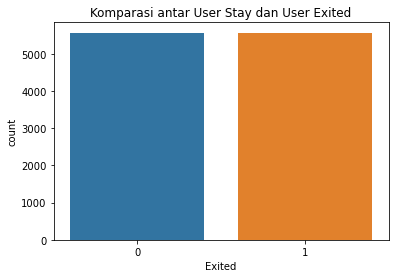

In [127]:
sns.countplot(dataset_smote["Exited"]).set(title='Komparasi antar User Stay dan User Exited')
plt.show()

## Random Under Sampling

In [128]:
dataset_rus = rus_fit_resample(dataset)

In [129]:
dataset_rus

,CreditScore,Balance,EstimatedSalary,Age,Tenure,NumOfProducts,IsActiveMember,HasCrCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,538.0,0.00,126962.41,33,5,2,0,1,1,0,0,1,0,0
1,710.0,118327.17,192928.82,33,10,2,1,1,1,0,0,0,1,0
2,545.0,0.00,94739.20,32,4,1,0,1,0,0,1,1,0,0
3,700.0,58781.76,16874.92,44,2,1,0,1,1,0,0,1,0,0
4,701.0,0.00,82526.92,39,2,2,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,663.0,136298.65,144593.30,52,0,1,0,1,0,0,1,0,1,1
2860,376.0,0.00,157333.69,46,6,1,0,1,1,0,0,1,0,1
2861,667.0,137260.78,94433.08,71,4,1,1,0,0,0,1,0,1,1
2862,585.0,106415.57,122960.98,55,10,3,1,1,1,0,0,0,1,1


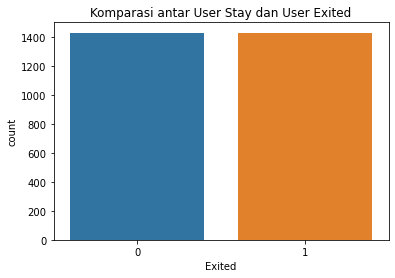

In [130]:
sns.countplot(dataset_rus["Exited"]).set(title='Komparasi antar User Stay dan User Exited')
plt.show()

## Random Over Sampling

In [131]:
dataset_ros = ros_fit_resample(dataset)

In [132]:
dataset_ros

,CreditScore,Balance,EstimatedSalary,Age,Tenure,NumOfProducts,IsActiveMember,HasCrCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,648.0,81370.07,181534.04,55,1,1,1,0,0,0,1,0,1,0
1,693.0,0.00,135502.77,57,9,2,1,1,0,0,1,1,0,0
2,586.0,0.00,168261.40,33,7,2,1,1,0,0,1,1,0,0
3,438.0,78398.69,44937.01,31,8,1,0,1,0,1,0,0,1,0
4,768.0,129264.05,19150.14,43,2,2,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11131,572.0,97750.07,193014.26,51,8,3,1,1,0,1,0,0,1,1
11132,415.0,134950.19,178587.36,46,9,3,0,0,1,0,0,0,1,1
11133,805.0,116585.97,189428.75,45,9,1,0,1,0,1,0,1,0,1
11134,729.0,117837.43,104016.61,46,5,1,0,1,0,1,0,0,1,1


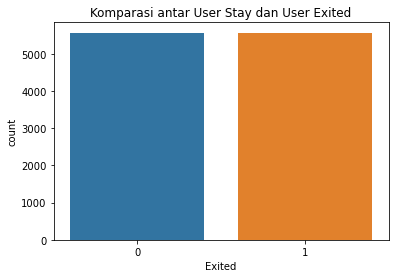

In [133]:
sns.countplot(dataset_ros["Exited"]).set(title='Komparasi antar User Stay dan User Exited')
plt.show()

In [134]:
X_train = dataset.drop(columns = "Exited")
y_train = dataset["Exited"]

In [135]:
X_train

,CreditScore,Balance,EstimatedSalary,Age,Tenure,NumOfProducts,IsActiveMember,HasCrCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
3144,648.0,81370.07,181534.04,55,1,1,1,0,0,0,1,0,1
9939,693.0,0.00,135502.77,57,9,2,1,1,0,0,1,1,0
7925,586.0,0.00,168261.40,33,7,2,1,1,0,0,1,1,0
309,438.0,78398.69,44937.01,31,8,1,0,1,0,1,0,0,1
9415,768.0,129264.05,19150.14,43,2,2,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9785,455.0,155879.09,70774.97,27,5,2,0,0,1,0,0,1,0
7763,614.0,44054.84,73329.08,36,1,1,1,1,0,0,1,1,0
5218,685.0,104719.94,38691.34,20,4,2,0,1,1,0,0,0,1
1346,643.0,94443.77,165614.40,30,5,1,1,1,1,0,0,0,1


In [136]:
y_train

3144    0
9939    0
7925    0
309     0
9415    0
       ..
9785    0
7763    0
5218    0
1346    0
3582    0
Name: Exited, Length: 7000, dtype: int64

In [137]:
X_valid = valid_set.drop(columns = "Exited")
y_valid = valid_set["Exited"]

In [138]:
X_valid

,CreditScore,Balance,EstimatedSalary,Age,Tenure,NumOfProducts,IsActiveMember,HasCrCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
135,589.0,144895.05,34941.23,50,5,2,1,1,0,1,0,1,0
7945,759.0,0.00,99251.24,45,8,2,1,1,1,0,0,1,0
7733,694.0,143212.22,102628.56,58,1,1,0,0,0,1,0,1,0
8785,850.0,101278.25,26265.18,27,1,2,1,1,0,1,0,0,1
555,590.0,154962.99,191932.27,51,3,3,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,709.0,0.00,162922.65,45,2,2,1,0,0,0,1,1,0
8507,653.0,114268.22,89524.83,38,5,2,1,1,0,1,0,1,0
819,720.0,137824.03,172557.77,43,6,2,0,1,1,0,0,1,0
1967,559.0,0.00,163221.22,25,5,2,1,1,0,0,1,0,1


In [139]:
y_valid

135     0
7945    0
7733    1
8785    0
555     1
       ..
388     0
8507    0
819     0
1967    0
4196    1
Name: Exited, Length: 1200, dtype: int64

In [140]:
X_test = test_set.drop(columns = "Exited")
y_test = test_set["Exited"]

In [141]:
X_test

,CreditScore,Balance,EstimatedSalary,Age,Tenure,NumOfProducts,IsActiveMember,HasCrCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
257,671.0,37266.67,156917.12,34,6,2,0,0,0,1,0,1,0
1173,478.0,92363.30,44912.70,36,3,2,0,1,0,0,1,1,0
9524,850.0,146756.68,78268.61,38,5,1,0,1,0,1,0,0,1
9830,593.0,99162.29,128384.11,32,6,1,0,1,1,0,0,0,1
6006,529.0,0.00,26817.23,31,5,2,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,563.0,139810.34,152417.79,34,6,1,1,1,1,0,0,1,0
5830,684.0,138476.41,52367.29,37,4,2,1,1,0,1,0,0,1
1425,726.0,109471.79,175161.05,42,2,1,1,0,1,0,0,1,0
4376,614.0,0.00,185561.89,34,5,2,0,1,1,0,0,1,0


In [142]:
y_test

257     0
1173    0
9524    0
9830    0
6006    0
       ..
966     0
5830    0
1425    0
4376    0
7912    0
Name: Exited, Length: 1800, dtype: int64

In [143]:
X_ros = dataset_ros.drop(columns = "Exited")
y_ros = dataset_ros["Exited"]

In [144]:
X_ros

,CreditScore,Balance,EstimatedSalary,Age,Tenure,NumOfProducts,IsActiveMember,HasCrCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,648.0,81370.07,181534.04,55,1,1,1,0,0,0,1,0,1
1,693.0,0.00,135502.77,57,9,2,1,1,0,0,1,1,0
2,586.0,0.00,168261.40,33,7,2,1,1,0,0,1,1,0
3,438.0,78398.69,44937.01,31,8,1,0,1,0,1,0,0,1
4,768.0,129264.05,19150.14,43,2,2,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11131,572.0,97750.07,193014.26,51,8,3,1,1,0,1,0,0,1
11132,415.0,134950.19,178587.36,46,9,3,0,0,1,0,0,0,1
11133,805.0,116585.97,189428.75,45,9,1,0,1,0,1,0,1,0
11134,729.0,117837.43,104016.61,46,5,1,0,1,0,1,0,0,1


In [145]:
y_ros

0        0
1        0
2        0
3        0
4        0
        ..
11131    1
11132    1
11133    1
11134    1
11135    1
Name: Exited, Length: 11136, dtype: int64

In [146]:
X_rus = dataset_rus.drop(columns = "Exited")
y_rus = dataset_rus["Exited"]

In [147]:
X_rus

,CreditScore,Balance,EstimatedSalary,Age,Tenure,NumOfProducts,IsActiveMember,HasCrCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,538.0,0.00,126962.41,33,5,2,0,1,1,0,0,1,0
1,710.0,118327.17,192928.82,33,10,2,1,1,1,0,0,0,1
2,545.0,0.00,94739.20,32,4,1,0,1,0,0,1,1,0
3,700.0,58781.76,16874.92,44,2,1,0,1,1,0,0,1,0
4,701.0,0.00,82526.92,39,2,2,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,663.0,136298.65,144593.30,52,0,1,0,1,0,0,1,0,1
2860,376.0,0.00,157333.69,46,6,1,0,1,1,0,0,1,0
2861,667.0,137260.78,94433.08,71,4,1,1,0,0,0,1,0,1
2862,585.0,106415.57,122960.98,55,10,3,1,1,1,0,0,0,1


In [148]:
y_rus

0       0
1       0
2       0
3       0
4       0
       ..
2859    1
2860    1
2861    1
2862    1
2863    1
Name: Exited, Length: 2864, dtype: int64

In [149]:
X_sm = dataset_smote.drop(columns = "Exited")
y_sm = dataset_smote["Exited"]

In [150]:
X_sm

,CreditScore,Balance,EstimatedSalary,Age,Tenure,NumOfProducts,IsActiveMember,HasCrCard,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,648.000000,81370.070000,181534.040000,55,1,1,1,0,0,0,1,0,1
1,693.000000,0.000000,135502.770000,57,9,2,1,1,0,0,1,1,0
2,586.000000,0.000000,168261.400000,33,7,2,1,1,0,0,1,1,0
3,438.000000,78398.690000,44937.010000,31,8,1,0,1,0,1,0,0,1
4,768.000000,129264.050000,19150.140000,43,2,2,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11131,680.782483,150251.473766,2397.615235,52,2,1,0,0,0,1,0,1,0
11132,558.005544,166907.714022,159279.079572,58,2,1,0,1,1,0,0,0,0
11133,777.393538,110067.911668,28872.635676,44,3,1,1,1,0,0,0,0,0
11134,538.358255,0.000000,104170.406952,50,1,2,1,1,1,0,0,0,0


In [151]:
y_sm

0        0
1        0
2        0
3        0
4        0
        ..
11131    1
11132    1
11133    1
11134    1
11135    1
Name: Exited, Length: 11136, dtype: int64

## Save Data

In [96]:
joblib.dump(X_train, "C:/Users/HALAL/Final Project ML Process/dataset/3 - final/1 - Encode - One Hot Encoding dan Balancing Data/X_train_ohebalance.pkl") 
joblib.dump(y_train, "C:/Users/HALAL/Final Project ML Process/dataset/3 - final/1 - Encode - One Hot Encoding dan Balancing Data/y_train_ohebalance.pkl")

joblib.dump(X_rus, "C:/Users/HALAL/Final Project ML Process/dataset/3 - final/1 - Encode - One Hot Encoding dan Balancing Data/x_rus.pkl")
joblib.dump(y_rus, "C:/Users/HALAL/Final Project ML Process/dataset/3 - final/1 - Encode - One Hot Encoding dan Balancing Data/y_rus.pkl")

joblib.dump(X_ros, "C:/Users/HALAL/Final Project ML Process/dataset/3 - final/1 - Encode - One Hot Encoding dan Balancing Data/x_ros.pkl")
joblib.dump(y_ros, "C:/Users/HALAL/Final Project ML Process/dataset/3 - final/1 - Encode - One Hot Encoding dan Balancing Data/y_ros.pkl")

joblib.dump(X_sm, "C:/Users/HALAL/Final Project ML Process/dataset/3 - final/1 - Encode - One Hot Encoding dan Balancing Data/x_sm.pkl")
joblib.dump(y_sm, "C:/Users/HALAL/Final Project ML Process/dataset/3 - final/1 - Encode - One Hot Encoding dan Balancing Data/y_sm.pkl")

joblib.dump(X_valid, "C:/Users/HALAL/Final Project ML Process/dataset/3 - final/1 - Encode - One Hot Encoding dan Balancing Data/x_valid_feng.pkl")
joblib.dump(y_valid, "C:/Users/HALAL/Final Project ML Process/dataset/3 - final/1 - Encode - One Hot Encoding dan Balancing Data/y_valid_feng.pkl")

joblib.dump(X_test, "C:/Users/HALAL/Final Project ML Process/dataset/3 - final/1 - Encode - One Hot Encoding dan Balancing Data/x_test_feng.pkl")
joblib.dump(y_test, "C:/Users/HALAL/Final Project ML Process/dataset/3 - final/1 - Encode - One Hot Encoding dan Balancing Data/y_test_feng.pkl")

['C:/Users/HALAL/Final Project ML Process/dataset/3 - final/1 - Encode - One Hot Encoding dan Balancing Data/y_test_feng.pkl']